# Example reduction

In [1]:
import sys
import os
sys.path.append(os.path.expanduser('~/git/LiquidsReflectometer/reduction'))

import numpy as np
import scipy.stats
from matplotlib import pyplot as plt
import matplotlib.lines as mlines

#%matplotlib notebook
%matplotlib ipympl

import warnings
warnings.filterwarnings('ignore', module='numpy')
warnings.filterwarnings('ignore')

In [2]:
import mantid
import mantid.simpleapi as api
mantid.kernel.config.setLogLevel(3)

ConfigService-[Error] logging set to error priority


In [3]:
print(mantid.__version__)
print(sys.version)

6.8.0
3.10.13 | packaged by conda-forge | (main, Oct 26 2023, 18:07:37) [GCC 12.3.0]


In [4]:
import importlib
from lr_reduction import workflow
from lr_reduction import template
from lr_reduction import output
from lr_reduction import event_reduction
from lr_reduction import reduction_template_reader
from lr_reduction import peak_finding


Processing: 198409
    DB center: 141.619	 Width: 1.70416 from [137 147]
    SC center: 141.47	 Width: 1.63214
    Two-theta = -1.19853
    Template peak: [136 147]
    New peak:      [136 147]
    New bck:       [133 150]
wl=15; ths=-0.600382; thi=-0.00812677; No offset
Background on both sides: [133 135] [148 150]


ValueError: operands could not be broadcast together with shapes (12,34) (3,34) (12,34) 

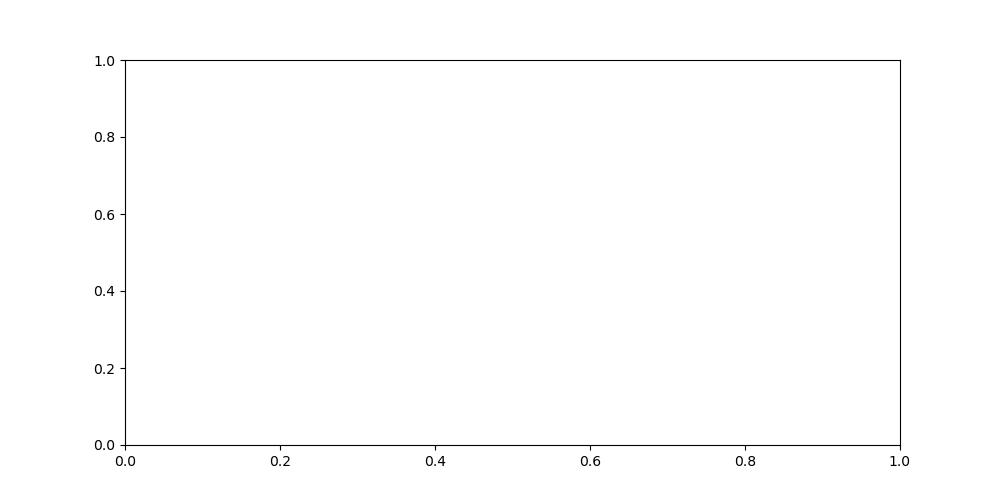

In [6]:
importlib.reload(workflow)
importlib.reload(output)
importlib.reload(event_reduction)
importlib.reload(peak_finding)
importlib.reload(template)

data_dir = os.path.expanduser('~/git/LiquidsReflectometer/reduction/data')
template_path = os.path.join(data_dir, 'template.xml')

fig, ax = plt.subplots(figsize=(10,5))
seq = 1

for i in range(198409, 198417):
    ws = api.Load("REF_L_%s" % i)
    workflow.reduce_fixed_two_theta(ws, template_path, output_dir=data_dir, average_overlap=False)
    #workflow.reduce(ws, template_path, output_dir=data_dir, pre_cut=1, post_cut=1, average_overlap=False)

    reduced_path = os.path.join(data_dir, 'REFL_198409_%s_%s_partial.txt' % (seq, i))
    if os.path.isfile(reduced_path):
        _refl = np.loadtxt(reduced_path).T
        plt.errorbar(_refl[0], _refl[1]*_refl[0]**4, yerr=_refl[2]*_refl[0]**4, markersize=4, marker='.', linestyle='', label='new reduction')

    seq += 1

plt.xlabel('q [$1/\AA$]')
plt.ylabel('R(q)')
ax.set_yscale('log')
ax.set_xscale('log')
plt.show()


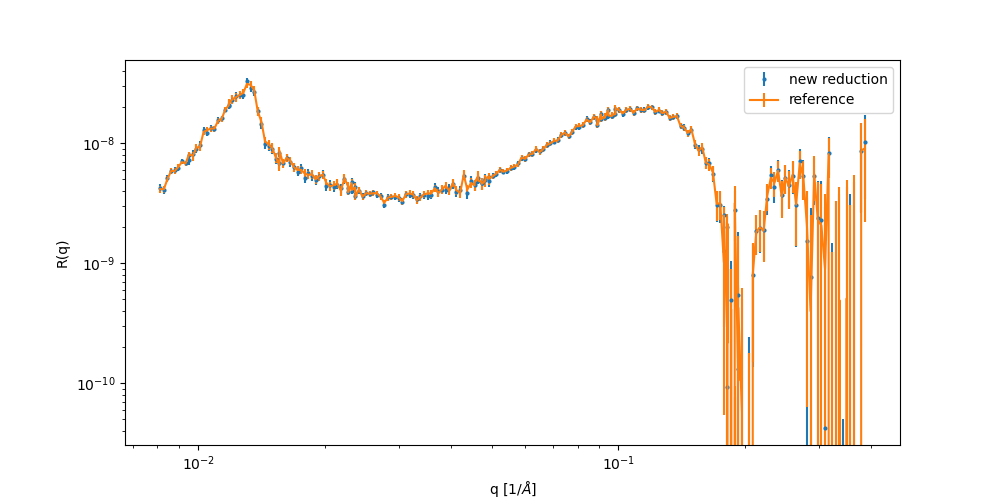

In [7]:
reduced_path = os.path.join(data_dir, 'reference_rq.txt')
if os.path.isfile(reduced_path):
    _data = np.loadtxt(reduced_path).T

reduced_path = os.path.join(data_dir, 'REFL_198409_combined_data_auto.txt')
if os.path.isfile(reduced_path):
    _refl = np.loadtxt(reduced_path).T

fig, ax = plt.subplots(figsize=(10,5))
plt.errorbar(_refl[0], _refl[1]*_refl[0]**4, yerr=_refl[2]*_refl[0]**4, markersize=4, marker='.', linestyle='', label='new reduction')
plt.errorbar(_data[0], _data[1]*_data[0]**4, yerr=_data[2]*_data[0]**4, markersize=4, marker='', linestyle='-', label='reference')

plt.legend()
plt.xlabel('q [$1/\AA$]')
plt.ylabel('R(q)')
ax.set_yscale('log')
ax.set_xscale('log')
plt.show()

